In [6]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
## Define Standard Units
fsize = 22
tsize = 15
tdir = 'in'
major = 5
minor = 3
style = 'default'

params = {
    'figure.figsize': (15,12),
    'savefig.dpi': 75,
    'text.usetex': False,
    'font.size': fsize,
    'legend.fontsize': tsize,
    'legend.title_fontsize': tsize,
    'mathtext.fontset' : 'stix',
    'font.family' : 'STIXGeneral',    
    'axes.labelsize':15,
    'axes.titlesize':20,
    'lines.linewidth':2.5,
    'axes.grid': False,
    'axes.labelweight':'bold',
    'legend.loc': 'upper right',
    'xtick.labelsize':'x-small',
    'ytick.labelsize':'x-small',
}
plt.rcParams.update(params)

In [7]:
"""
Joakim Pugesgaard Sandberg, 2025
s203937@dtu.dk
"""
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class domain:
    
    """
    Class to create a domain in cartesian or spherical coordinates
    
    Parameters:
    size: float
        Size of the domain in µm
    planes: dict
        Dictionary with the planes to be plotted. Options are "xy", "xz", and "yz"

    Methods:
    cart_grid: Create a grid in cartesian coordinates
    spherical_grid: Convert cartesian grids to spherical coordinates
    show_coord: Plot the desired coordinate in the desired plane
    
    """
    
    
    def __init__(self, size, planes = {"xy", "xz"}):
        self.size = size
        self.N = 300 # Number of points in each direction
        self.planes = planes
        self.check_params(size, planes)
        
        self.coords = {
            "xy": {"z": 0, "x": np.linspace(-size, size, self.N), "y": np.linspace(-size, size, self.N)},
            "xz": {"y": 0, "x": np.linspace(-size, size, self.N), "z": np.linspace(-size, size, self.N)},
            "yz": {"x": 0, "y": np.linspace(-size, size, self.N), "z": np.linspace(-size, size, self.N)}
        }
        
    
    def check_params(self, size, planes):
        if size <= 0:
            raise ValueError("size must be a positive number")

        valid_planes = {"xy", "xz", "yz"}
        for plane in planes:
            if plane not in valid_planes:
                raise ValueError(f"Invalid plane: {plane}. Valid planes are 'xy', 'xz', 'yz'.")
        
    def cart_grid(self):
        # Create a grid in cartesian coordinates of the desired planes given a size and resolution (number of points)
        cart_grids = {}
        
        if "xy" in self.planes:
            x1 = self.coords["xy"]["x"]
            y1 = self.coords["xy"]["y"]
            x1, y1 = np.meshgrid(x1, y1, indexing='ij')
            cart_grids["xy"] = np.array([x1, y1])
        
        if "xz" in self.planes:
            x2 = self.coords["xz"]["x"]
            z2 = self.coords["xz"]["z"]
            x2, z2 = np.meshgrid(x2, z2, indexing='ij')
            cart_grids["xz"] = np.array([x2, z2])
        
        if "yz" in self.planes:
            y3 = self.coords["yz"]["y"]
            z3 = self.coords["yz"]["z"]
            y3, z3 = np.meshgrid(y3, z3, indexing='ij')
            cart_grids["yz"] = np.array([y3, z3])
        
        return cart_grids

    def spherical_grid(self):
        # Convert cartesian grids to spherical coordinates
        cart_grids = self.cart_grid()
        spherical_grids = {}
        
        for plane, cart_grid in cart_grids.items():
            if plane == "xy":
                x, y = cart_grid
                z = 0
            elif plane == "xz":
                x, z = cart_grid
                y = 0
            elif plane == "yz":
                y, z = cart_grid
                x = 0
            
            r = np.sqrt(x**2 + y**2 + z**2)
            theta = np.arccos(z / r)
            phi = np.arctan2(y, x)
            
            spherical_grids[plane] = np.array([r, theta, phi])

        return spherical_grids
        
    def show_coord(self, coord, spherical_grids):
        if coord not in ["r", "theta", "phi"]:
            raise ValueError("Invalid coordinate. Choose from 'r', 'theta', or 'phi'.")
        
        cart_grids = self.cart_grid()
        
        fig, axes = plt.subplots(1, len(set(self.planes)), figsize=(5*len(set(self.planes)), 5))
        if len(self.planes) == 1:
            axes = [axes]
        
        for ax, plane in zip(axes, self.planes):
            cart_grid = cart_grids[plane]
            spherical_grid = spherical_grids[plane]
            if coord == "r":
                c = spherical_grid[0]
            elif coord == "theta":
                c = spherical_grid[1]
            elif coord == "phi":
                c = spherical_grid[2]

            c = c.T
            
            if plane == "xy":
                x, y = cart_grid
                im = ax.imshow(c, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower')
                ax.set_xlabel('X [µm]')
                ax.set_ylabel('Y [µm]')
                ax.set_title(f"{coord} in {plane} plane")
            elif plane == "xz":
                x, z = cart_grid
                im = ax.imshow(c, extent=(x.min(), x.max(), z.min(), z.max()), origin='lower')
                ax.set_xlabel('X [µm]')
                ax.set_ylabel('Z [µm]')
                ax.set_title(f"{coord} in {plane} plane")
            elif plane == "yz":
                y, z = cart_grid
                im = ax.imshow(c, extent=(y.min(), y.max(), z.min(), z.max()), origin='lower')
                ax.set_xlabel('Y [µm]')
                ax.set_ylabel('Z [µm]')
                ax.set_title(f"{coord} in {plane} plane")
            
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            plt.colorbar(im, cax=cax)
        
        fig.tight_layout()
        plt.show()


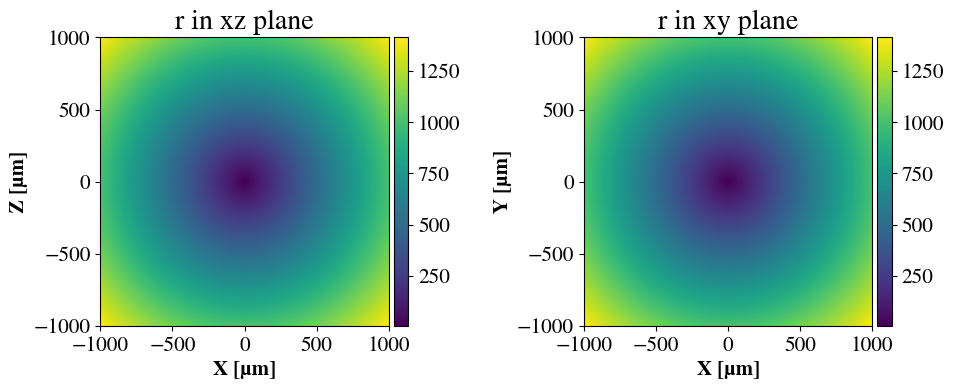

In [8]:
planes = {"xy","xz"}
d = domain(1000, planes)
spherical_grids = d.spherical_grid()
d.show_coord("r", spherical_grids)